In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans

In [12]:
try:
    import kagglehub
except ImportError:
    !pip install kagglehub
    import kagglehub

dataset_slug = "shwetabh123/mall-customers"
dataset_path = kagglehub.dataset_download(dataset_slug)
csv_file_path = None

for file in os.listdir(dataset_path):
    if file.lower().endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, file)
        break

if csv_file_path and os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print("Dataset loaded successfully. First 5 rows:")
    display(df.head())
else:
    raise FileNotFoundError("CSV file not found in downloaded dataset folder.")

Dataset loaded successfully. First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.shape

(200, 5)

In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [17]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
df.drop(["CustomerID"],axis=1, inplace=True)

In [19]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\oa1\AppData\Local\Temp\ipykernel_4388\1904616035.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\oa1\AppData\Local\Temp\ipykernel_4388\1904616035.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\oa1\AppData\Local\Temp\ipykerne

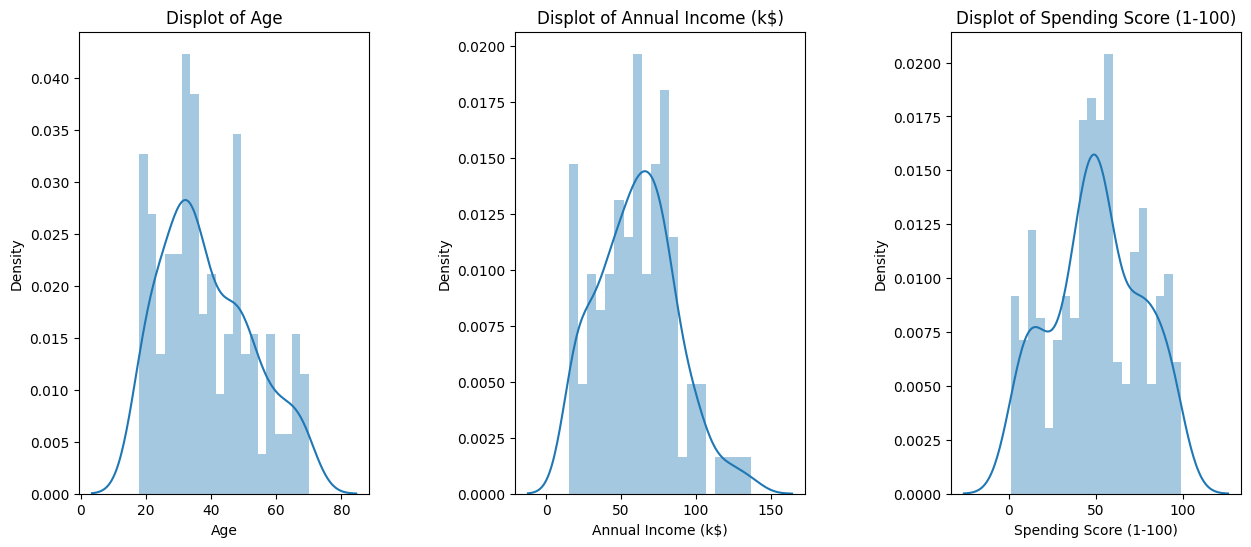

In [29]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=-0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Displot of {}'.format(x))
plt.show()

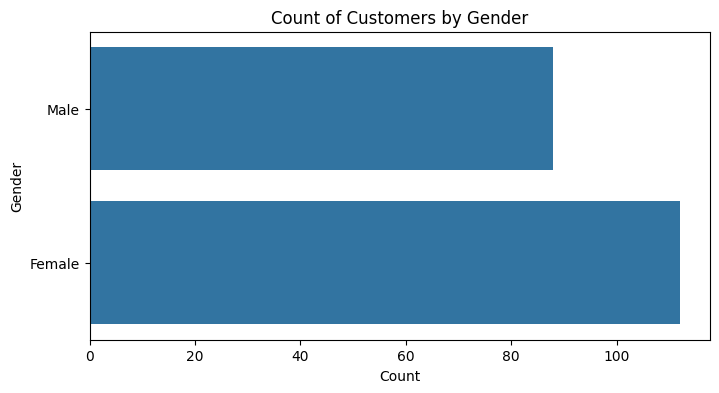

In [30]:
plt.figure(figsize=(8,4))
sns.countplot(y='Genre', data=df)
plt.title("Count of Customers by Gender")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.show()


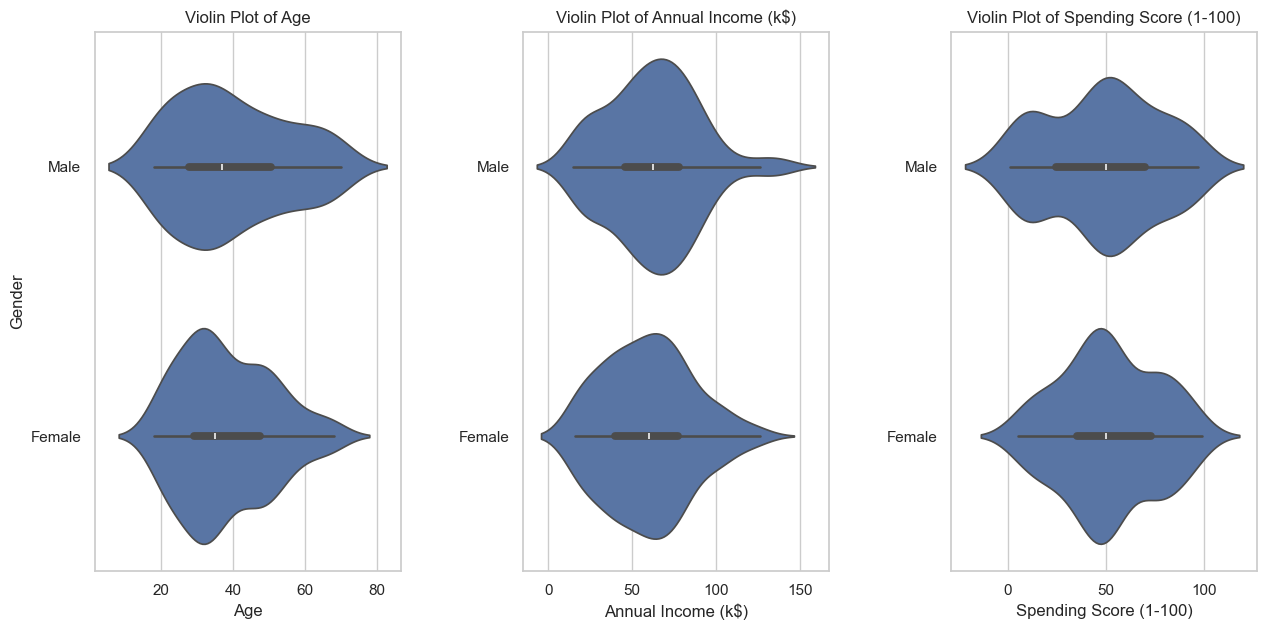

In [31]:
plt.figure(figsize=(15, 7))
sns.set(style="whitegrid")
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.violinplot(x=col, y='Genre', data=df)  # Use 'Genre' if that's the actual column name
    plt.ylabel('Gender' if i == 1 else '')
    plt.title(f'Violin Plot of {col}')

plt.show()

C:\Users\oa1\AppData\Local\Temp\ipykernel_4388\690510842.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


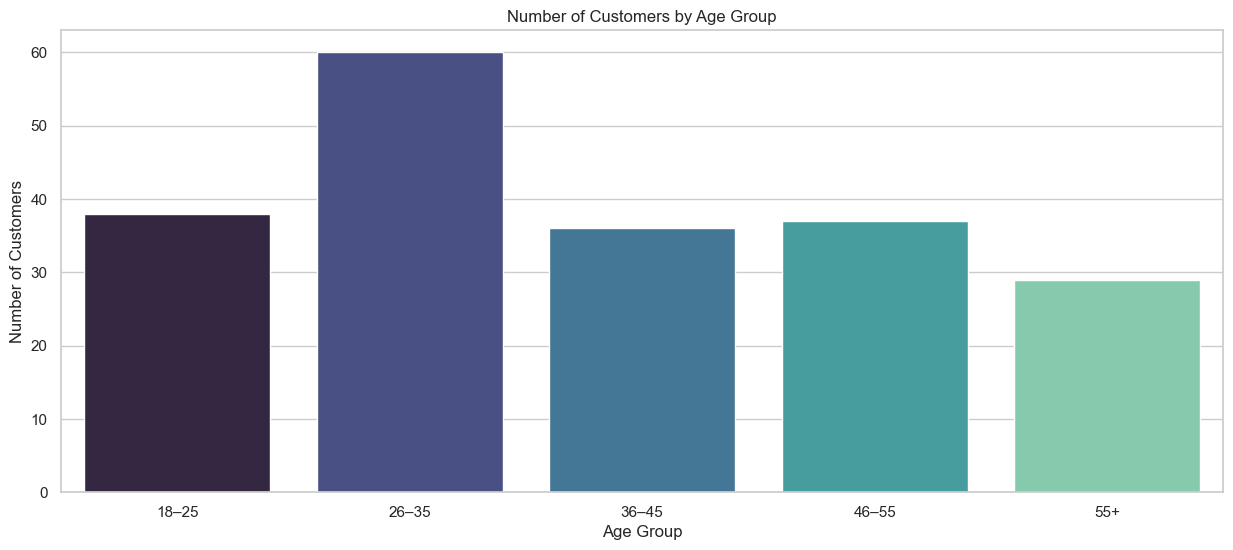

In [32]:
age_18_25 = df[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df[(df.Age >= 46) & (df.Age <= 55)]
age_55_above = df[df.Age >= 56]

agex = ["18–25", "26–35", "36–45", "46–55", "55+"]
agey = [
    len(age_18_25),
    len(age_26_35),
    len(age_36_45),
    len(age_46_55),
    len(age_55_above)
]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

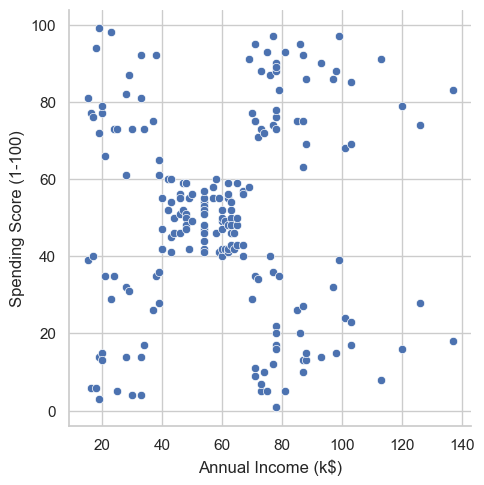

In [33]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.show()


C:\Users\oa1\AppData\Local\Temp\ipykernel_4388\980139609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette="rocket")


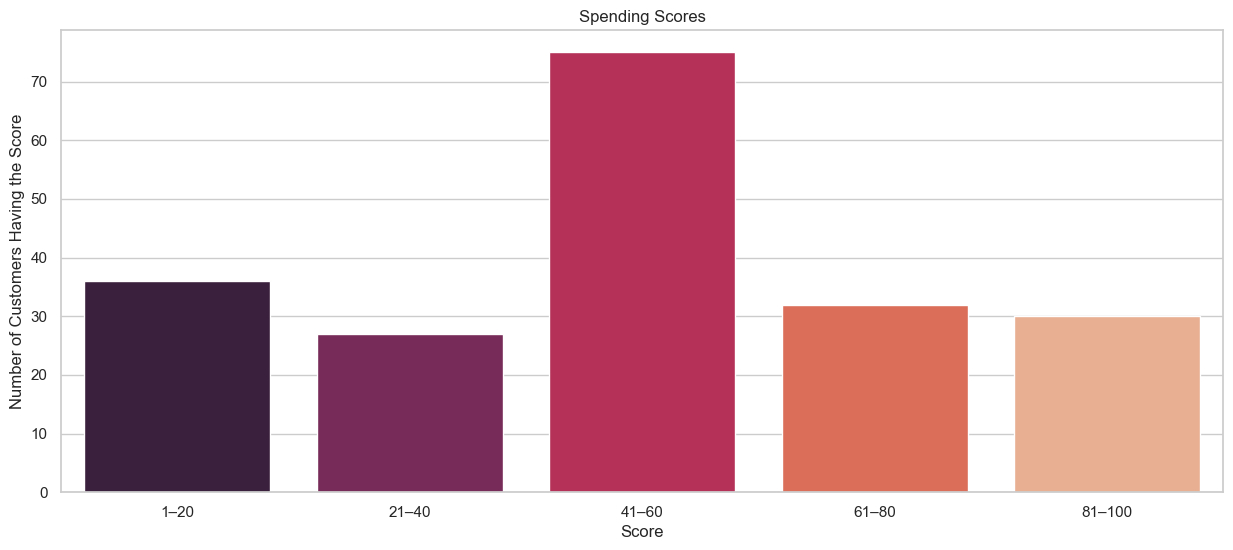

In [34]:
bins = [0, 20, 40, 60, 80, 100]
labels = ["1–20", "21–40", "41–60", "61–80", "81–100"]
df['SpendingGroup'] = pd.cut(df["Spending Score (1-100)"], bins=bins, labels=labels)

score_counts = df['SpendingGroup'].value_counts().sort_index()

plt.figure(figsize=(15,6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers Having the Score")
plt.show()


C:\Users\oa1\AppData\Local\Temp\ipykernel_4388\2796210489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values, palette="Spectral")


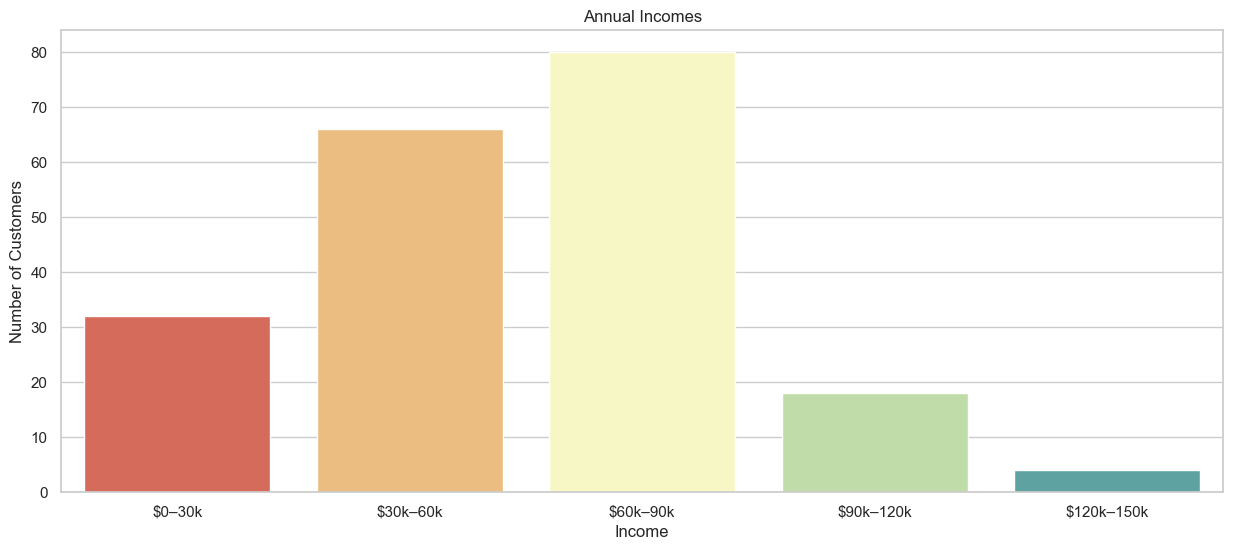

In [35]:
income_bins = [0, 30, 60, 90, 120, 150]
income_labels = ["$0–30k", "$30k–60k", "$60k–90k", "$90k–120k", "$120k–150k"]
df['IncomeGroup'] = pd.cut(df["Annual Income (k$)"], bins=income_bins, labels=income_labels)

income_counts = df['IncomeGroup'].value_counts().sort_index()

plt.figure(figsize=(15,6))
sns.barplot(x=income_counts.index, y=income_counts.values, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

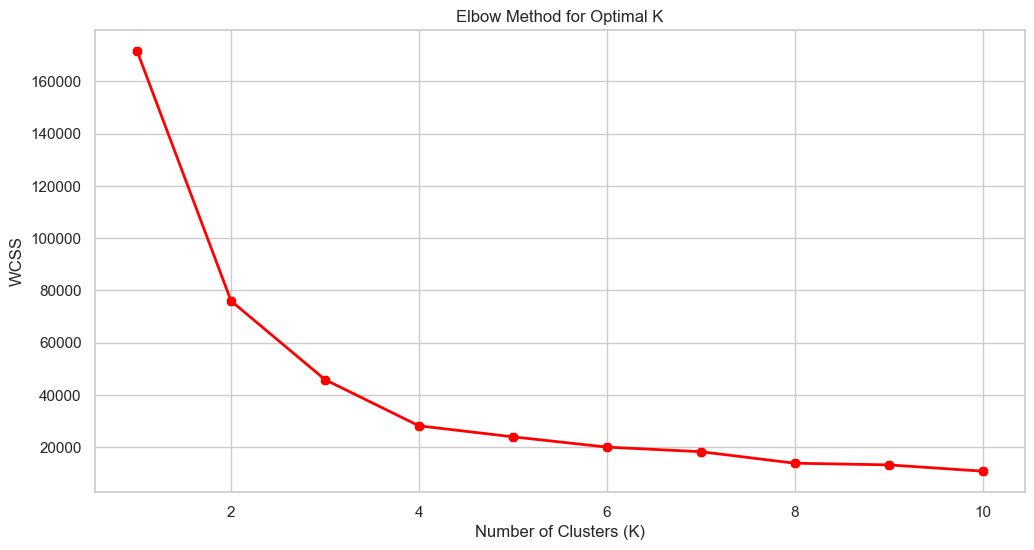

In [38]:
X = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, color='red', marker='8', linewidth=2)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

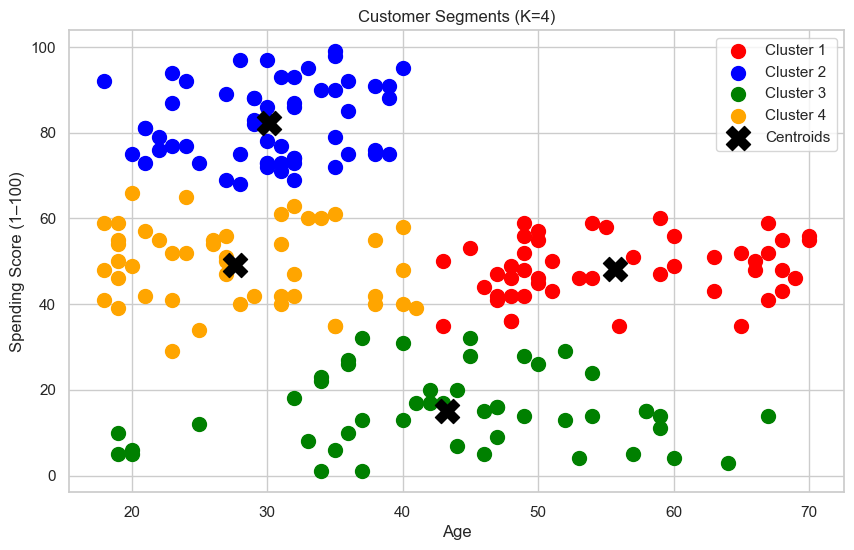

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange']

for i in range(4):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segments (K=4)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()


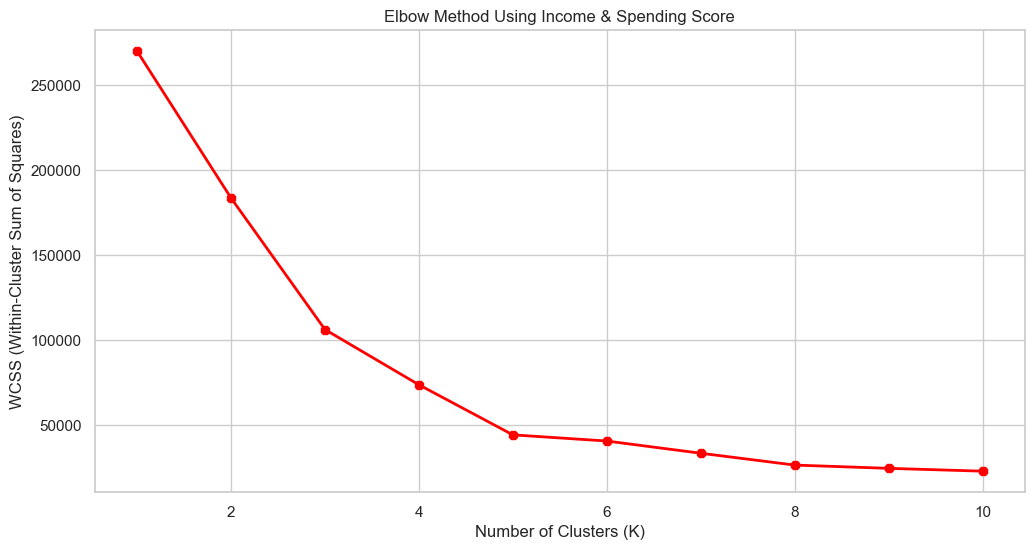

In [40]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='8', color='red', linewidth=2)
plt.title("Elbow Method Using Income & Spending Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

Cluster Labels:
 [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]

Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


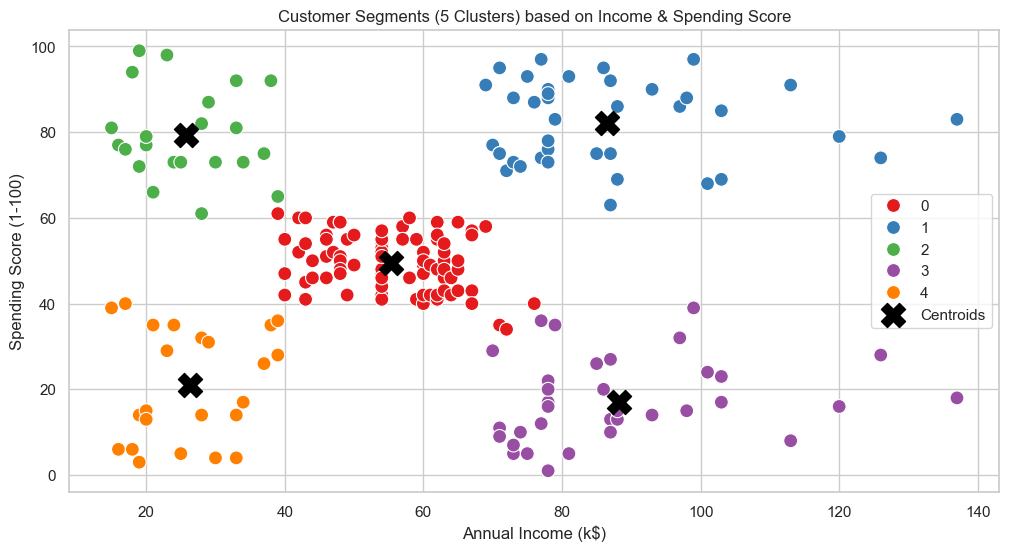

In [41]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X2)
centroids = kmeans.cluster_centers_

df['Cluster'] = labels

print("Cluster Labels:\n", labels)
print("\nCluster Centers:\n", centroids)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X2[:, 0], y=X2[:, 1], hue=labels, palette='Set1', s=100, legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title("Customer Segments (5 Clusters) based on Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()

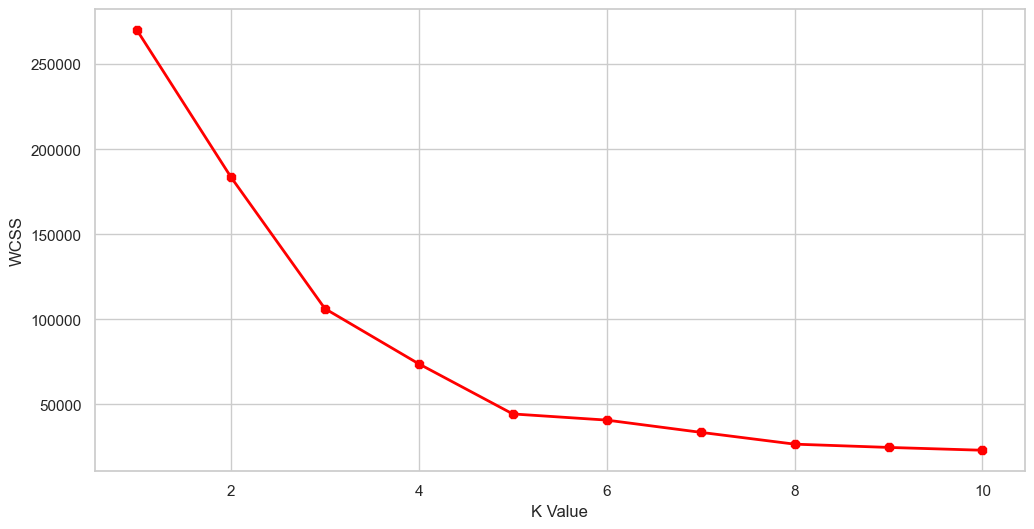

In [44]:
X3 = df.select_dtypes(include=['int64', 'float64']).iloc[:, 1:].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [45]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X3)

print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


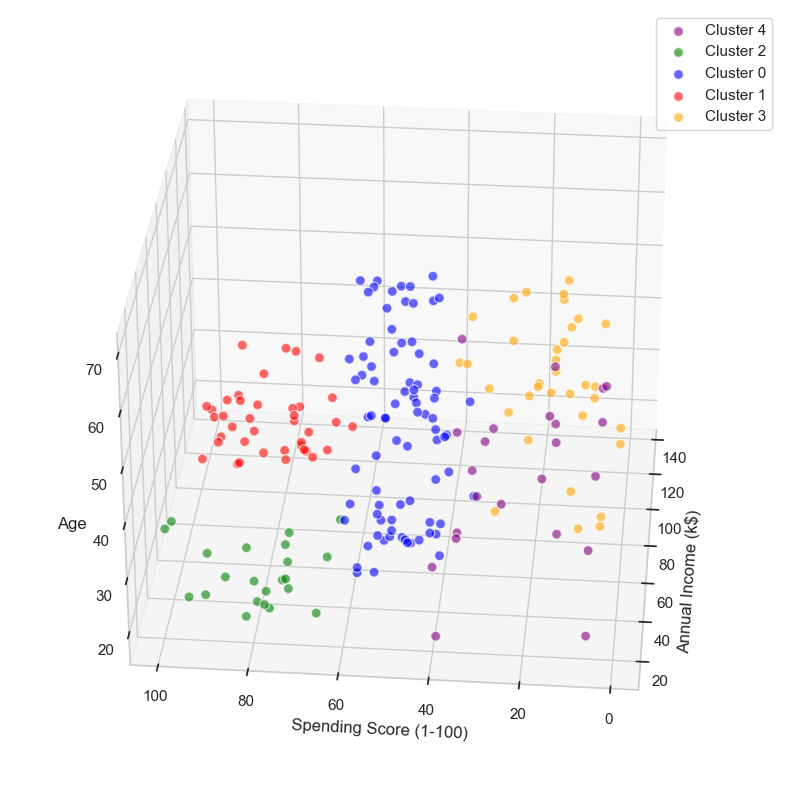

In [46]:
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'green', 'orange', 'purple']
labels = df['label'].unique()

for label in labels:
    cluster_data = df[df['label'] == label]
    ax.scatter(
        cluster_data["Annual Income (k$)"], 
        cluster_data["Spending Score (1-100)"], 
        cluster_data["Age"], 
        c=colors[label], 
        label=f'Cluster {label}', 
        s=50, alpha=0.6, edgecolors='w'
    )

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
ax.view_init(30, 185)
ax.legend()
plt.show()